# SMV2rho: Tutorial 6

In this tutorial we will propagate uncertainties through the density conversion scheme.

Let's import the appropriate functions and get started.

In [1]:
# import modules
import numpy as np
from SMV2rho import plotting as smplt
from SMV2rho import density_functions as smd
from SMV2rho import uncertainties as unc
from SMV2rho import constants as c
from SMV2rho import temperature_dependence as td

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


First create the constants object...

In [2]:
# create the constants object.
constants = c.Constants()

constants.get_v_constants('Vp')
constants.get_v_constants('Vs')
constants.get_material_constants()

Now create the geotherm object.  This time we will pass an uncertainty_constants object to the class instance.

We will set the crustal thickness for our profile to 45 km for this example.  Note that we do not actually have to provide a velocity profile to estimate uncertainties because we are assuming that our paameter uncertainties do not depend on the abolute velocity.  The slight wrinkle in the assumption is that the geothermal gradient in some parametrisations depends on the absolute value of density, $\rho$.  However, we can just assume $\rho = 2.9$ g/cm<sup>3</sup> for this example.  When we calculate uncertainties on real profiles, we will use the value for bulk density of the profile.

In [28]:
# create the geotherm object using default parameters
geotherm = td.Geotherm(
    geotherm_type='single_layer_flux_difference',
    uncertainty_constants=td.GeothermConstantUncertainties(),
    tc = 45)

print("Geotherm parameters:")
print(geotherm)
print("geotherm uncertainty parameters:")
print(geotherm.uncertainties)

Geotherm parameters:
Geotherm(tc=45, T0=10.0, T1=600.0, q0=0.059, qm=0.03, k=2.5, H0=7e-10, hr=10.0, rho=2.9)
geotherm uncertainty parameters:
GeothermConstantUncertainties(tc_unc=0.0, T0_unc=0.0, T1_unc=200.0, q0_unc=0.014, qm_unc=0.01, k_unc=0, H0_unc=2e-10, hr_unc=5.0, rho_unc=0.0)


## Outputs and plotting

We can now run the uncertainty propagation with the option `make_plots = True` and inspect the outputs below...

The plots show the mean value of the errors and corrections.

In the first two plots, we are looking at the magnitude of the correction that must be applied to the $\rho_\circ$ value obtained from the pressure-dependent densityb conversion.  This correction accounts for the temperature dependent reduction in $v$ given a range of geothermal gradients, and the uncertainty in the $m$ parameter.  The first panel shows the mean absolute value of the corerection by summing errors in $\rho$.  The second panel shows the mean value of the correction and error by propagating fractional errors in $\rho$.  The second panel is the preferred approach.

The third panel shows uncertainties in geothermal gradient calculated by randomly sampling the parameters defining the geotherm.  Note again that we only currently support one method of calculating the geotherm (see Stephenson et al, _in review_).  This will be improved in later releases.

Other panels show the mean value of corrections applied as a result of compression and thermal expansion and their uncertainties, both by summing errors and by calculating and multiplying fractional uncertainties.

The final panel shows the error in $\rho_\circ$ arising from uncertainty in both the geothermal gradient and the uncertainty in $m$.

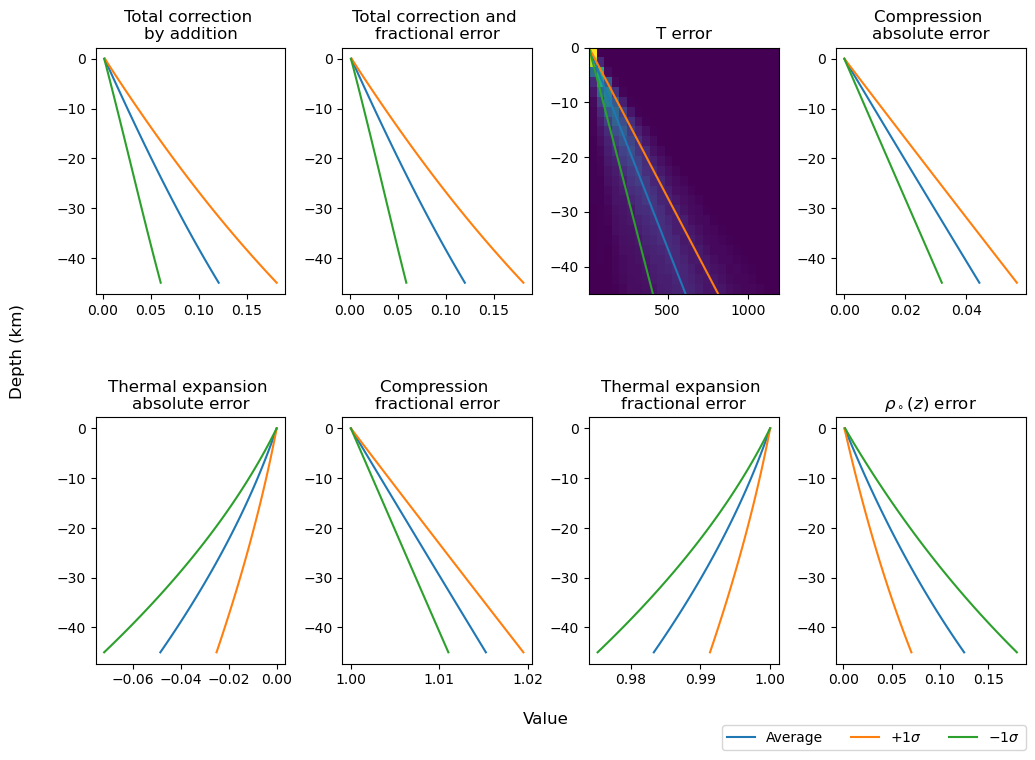

In [29]:
sigma = unc.rho_err(
    constants, 
    geotherm,
    N=1000, 
    z_slices=50, 
    profile_type='Vp'
    make_plots=True,
    save_plots=False
)

## Bulk crustal uncertainty

We can now see the estimate of bulk crustal density uncertainty arising from these uncertainty values.  Again, we can see the error by propagating fractional errors, or by summing errors.  We can see that the result is not hugely different.
Note that we must multiply by the error in the pressure-dependent velocity-to-density conversion in order to see the total uncertainty in density.  The error in velocity-to-density conversion dominates the combined error.

In [30]:
dens_conv_err = 0.11

print(f"Absolute bulk density error = {np.sqrt(sigma[0]**2 + dens_conv_err**2)}")

Absolute bulk density error = 0.11494060243381601


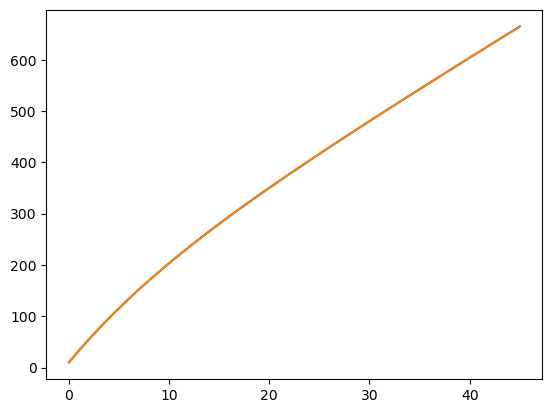

In [39]:
import matplotlib.pyplot as plt

geotherm.generate_geotherm()

plt.plot(geotherm.z, td.cont_geotherm_heat_flux_difference(geotherm.z * 1000))
plt.plot(geotherm.z, geotherm.T)

plt.show()